# Análise Exploratória - Dados transporte

Comparação dos dados do **DNIT** e **IBGE**

Bases utilizadas:
- DNIT: https://servicos.dnit.gov.br/dadospnct/PesquisaOD/BaseDeDados
- IBGE: https://www.ibge.gov.br/geociencias/organizacao-do-territorio/redes-e-fluxos-geograficos/15794-rodoviarias-e-hidroviarias.html

## Importando bibliotecas

In [111]:
import pandas as pd
import seaborn as sns
sns.set(rc={'figure.figsize':(6,3)})

## Carregando Dados

Dados do IBGE: 
- VAR05 - Frequência de saídas de veículos hidroviários no par de ligação
- VAR06 - Frequência de saídas de veículos rodoviários no par de ligação
- VAR07 - Frequência total de saídas de veículos no par de ligação

In [112]:
#Carregando dados do IBGE
df_ibge = pd.read_excel(open('data/Base_de_dados_ligacoes_rodoviarias_e_hidroviarias_2016.xlsx', 'rb'), sheet_name='Base de dados', 
                               dtype = {'ID': int, 'CODMUNDV_A': int, 'CODMUNDV_B': int}) 
df_ibge.head()

,ID,COD_UF_A,UF_A,CODMUNDV_A,NOMEMUN_A,COD_UF_B,UF_B,CODMUNDV_B,NOMEMUN_B,VAR01,...,VAR05,VAR06,VAR07,VAR08,VAR09,VAR10,VAR11,VAR12,VAR13,VAR14
0,13026031304260,13,AM,1302603,Manaus,13,AM,1304260,Uarini,Núcleo de Metrópole (Manaus),...,7.5,0.0,7.5,-60.023335,-3.134691,-65.155346,-2.983609,0.0,Não,0.023148
1,13021081302603,13,AM,1302108,Japurá,13,AM,1302603,Manaus,Centro Local,...,3.0,0.0,3.0,-66.996903,-1.880845,-60.023335,-3.134691,3.0,Não,0.026620
2,51038095108402,51,MT,5103809,Figueirópolis D'Oeste,51,MT,5108402,Várzea Grande,Centro Local,...,0.0,42.0,42.0,-58.737825,-15.446135,-56.144664,-15.658065,0.0,Sim,0.028000
3,13000291302603,13,AM,1300029,Alvarães,13,AM,1302603,Manaus,Centro Local,...,7.5,0.0,7.5,-64.813535,-3.216584,-60.023335,-3.134691,0.0,Não,0.031250
4,13000291301308,13,AM,1300029,Alvarães,13,AM,1301308,Codajás,Centro Local,...,6.0,0.0,6.0,-64.813535,-3.216584,-62.063430,-3.843046,0.0,Não,0.036232


In [158]:
# Carregando dados DNIT
df_dnit_2016_1 = pd.read_excel(open('data/PesquisaOD_2016_2017.xlsx', 'rb'), sheet_name='BD_2PNT2017') 
df_dnit_2016_1.head()

,idPesquisa,idOD,idPosto,Sentido,DataIniPesq,DataFimPesq,POrigem,MOrigem,UFOrigem,NodeIDOrigem,...,MunDesembCarga,UFDesembCarga,LocalDesembCarga,IndoPegarCarga,MunParadaObr1,UFParadaObr1,MunParadaObr2,UFParadaObr2,considerar_parOD?,considerar_socio?
0,4,1,231,AB,2017-11-18 06:53:15,2017-11-18 06:57:15,Brasil,Guapiara,SP,18048.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1,4,2,231,AB,2017-11-18 06:58:30,2017-11-18 07:09:56,Brasil,Capão Bonito,SP,18058.0,...,Não informado,Não informado,Não informado,NaN,NaN,NaN,NaN,NaN,1,1
2,4,3,231,AB,2017-11-18 07:13:04,2017-11-18 07:15:59,Brasil,Sorocaba,SP,18239.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
3,4,4,231,AB,2017-11-18 07:17:52,2017-11-18 07:20:11,Brasil,Sorocaba,SP,18239.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
4,4,5,231,AB,2017-11-18 07:21:24,2017-11-18 07:24:34,Brasil,São Paulo,SP,18290.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1


## Análise preliminar

### Verificando tipos dos dados

In [159]:
df_ibge.dtypes

ID              int64
COD_UF_A        int64
UF_A           object
CODMUNDV_A      int64
NOMEMUN_A      object
COD_UF_B        int64
UF_B           object
CODMUNDV_B      int64
NOMEMUN_B      object
VAR01          object
VAR02          object
VAR03         float64
VAR04           int64
VAR05         float64
VAR06         float64
VAR07         float64
VAR08         float64
VAR09         float64
VAR10         float64
VAR11         float64
VAR12         float64
VAR13          object
VAR14         float64
dtype: object

In [160]:
df_dnit_2016_1.dtypes

idPesquisa                    int64
idOD                          int64
idPosto                       int64
Sentido                      object
DataIniPesq          datetime64[ns]
                          ...      
UFParadaObr1                 object
MunParadaObr2                object
UFParadaObr2                 object
considerar_parOD?             int64
considerar_socio?             int64
Length: 65, dtype: object

In [161]:
df_dnit_2016_1[["GeocodOrigem", "GeocodDestino"]].dtypes

GeocodOrigem     float64
GeocodDestino    float64
dtype: object

### Verificando dados faltantes

In [162]:
df_ibge[df_ibge["VAR05"].isnull()]
df_ibge[df_ibge["VAR06"].isnull()]
df_ibge[df_ibge["VAR07"].isnull()]
#Não há dados faltantes no IBGE

,ID,COD_UF_A,UF_A,CODMUNDV_A,NOMEMUN_A,COD_UF_B,UF_B,CODMUNDV_B,NOMEMUN_B,VAR01,...,VAR05,VAR06,VAR07,VAR08,VAR09,VAR10,VAR11,VAR12,VAR13,VAR14


Não foi encontrado dados faltantates no IBGE

### Verficando distribuição dos dados

Distribuição IBGE

In [163]:
df_ibge[["VAR05", "VAR06", "VAR07"]].describe()

,VAR05,VAR06,VAR07
count,65638.000000,65638.000000,65638.000000
mean,0.157580,47.763445,47.921025
std,4.600863,99.994426,100.094421
min,0.000000,0.000000,0.250000
25%,0.000000,9.000000,10.000000
50%,0.000000,20.000000,20.000000
75%,0.000000,44.000000,44.000000
max,539.000000,2855.000000,2855.000000


<AxesSubplot: xlabel='VAR06'>

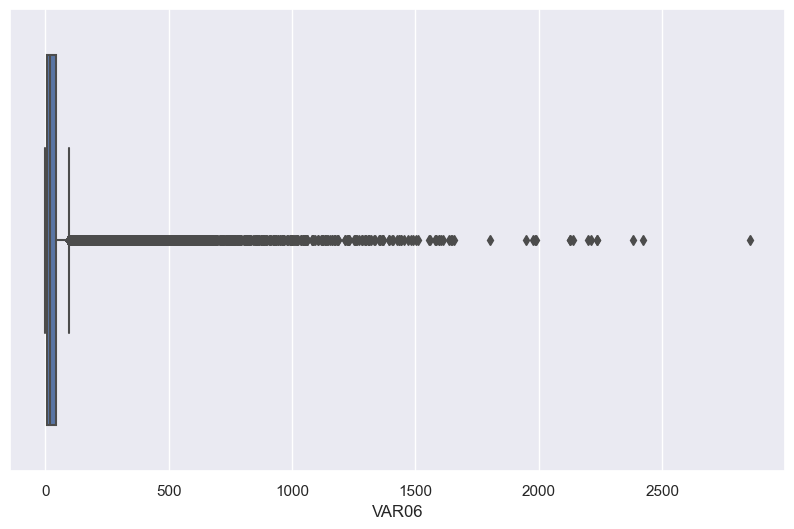

In [164]:
sns.boxplot(data=df_ibge, x="VAR06")

Observações do IBGE:
- Os dados IBGE apresentam 65638 ligações

Distribuição DNIT

Processando dados do DNIT para o mesmo formato do IBGE

In [165]:
#Removendo linhas com origem e destino faltante
df_dnit_2016_1 = df_dnit_2016_1[(df_dnit_2016_1['GeocodOrigem'].notna()) & (df_dnit_2016_1['GeocodDestino'].notna())]
df_dnit_2016_1 = df_dnit_2016_1.astype({"GeocodOrigem": int, "GeocodDestino": int})
df_dnit_2016_1.head()

,idPesquisa,idOD,idPosto,Sentido,DataIniPesq,DataFimPesq,POrigem,MOrigem,UFOrigem,NodeIDOrigem,...,MunDesembCarga,UFDesembCarga,LocalDesembCarga,IndoPegarCarga,MunParadaObr1,UFParadaObr1,MunParadaObr2,UFParadaObr2,considerar_parOD?,considerar_socio?
0,4,1,231,AB,2017-11-18 06:53:15,2017-11-18 06:57:15,Brasil,Guapiara,SP,18048.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
1,4,2,231,AB,2017-11-18 06:58:30,2017-11-18 07:09:56,Brasil,Capão Bonito,SP,18058.0,...,Não informado,Não informado,Não informado,NaN,NaN,NaN,NaN,NaN,1,1
2,4,3,231,AB,2017-11-18 07:13:04,2017-11-18 07:15:59,Brasil,Sorocaba,SP,18239.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
3,4,4,231,AB,2017-11-18 07:17:52,2017-11-18 07:20:11,Brasil,Sorocaba,SP,18239.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1
4,4,5,231,AB,2017-11-18 07:21:24,2017-11-18 07:24:34,Brasil,São Paulo,SP,18290.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1


In [166]:
#Filtrando observações por tipo de automóvel
df_dnit_2016_1 = df_dnit_2016_1[(df_dnit_2016_1['Classe']=="P2") 
             | (df_dnit_2016_1['Classe']=="O1") 
             | (df_dnit_2016_1['Classe']=="O2") 
             | (df_dnit_2016_1['Classe']=="O3")] 

In [167]:
#Tamanho depois da filtragem
df_dnit_2016_1.shape

(8864, 65)

In [168]:
#Verificando se existem origem e destinos iguais
# df_dnit_2016_1[(df_dnit_2016_1["GeocodOrigem"]==5003702.0)&(df_dnit_2016_1["GeocodDestino"]==5003702.0)]

In [169]:
#Agrupando ocorrência ligações
df_dnit = pd.DataFrame({'freq_semanal' : df_dnit_2016_1.groupby( [ "GeocodOrigem", "GeocodDestino" ] ).size()}).reset_index()
df_dnit


,GeocodOrigem,GeocodDestino,count
0,1100023,1100049,3
1,1100023,1100205,1
2,1100023,1100304,1
3,1100023,1101468,1
4,1100049,1100049,8
...,...,...,...
4374,5300108,5211800,5
4375,5300108,5218300,1
4376,5300108,5218904,1
4377,5300108,5221700,1


Removendo ligações com GeocodOrigem==GeocodDestino

In [170]:
df_dnit = df_dnit[df_dnit["GeocodOrigem"]!=df_dnit["GeocodDestino"]]

Ligações com maiores quantidades

In [171]:
df_dnit.sort_values(['freq_semanal'], ascending=False).head(10)
#df_dnit.loc[df_dnit['count'].idxmax()]

,GeocodOrigem,GeocodDestino,count
3532,3550308,3106200,46
4043,5103403,5107602,42
346,2203909,2211001,41
254,2111102,2111953,37
279,2111953,2111102,35
1168,2927408,2908408,31
2611,3301009,3302205,30
3432,3549805,3525706,29
652,2611002,2924009,28
1026,2911709,2905206,27


In [172]:
#Verificando distribuição de dados
df_dnit["freq_semanal"].describe()

count    4246.000000
mean        1.903674
std         2.906943
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        46.000000
Name: count, dtype: float64

Observações sobre os dados do DNIT:

2016.1
- O arquivo original do DNIT possui 212329 observações
- Forama removidos as ligações com código de origem e destino faltante -> pelo que verifiquei são destinos fora do Brasil
- Foram filtraos por P2, O1, O2 e O3 -> sobraram 3908 observaçoes
- Após o groupBy foram encontrados X ocorrencias de GeocodOrigem == GeocodDestino
- Essas ocorrencias foram retiradas do DF
- Depois da remoção foram encontradas 2080 ligações
- A ligação com o maior número de entrevista é GeocodOrigem:4314407, GeocodDestino:4315602, count:62.
 

<AxesSubplot: xlabel='count'>

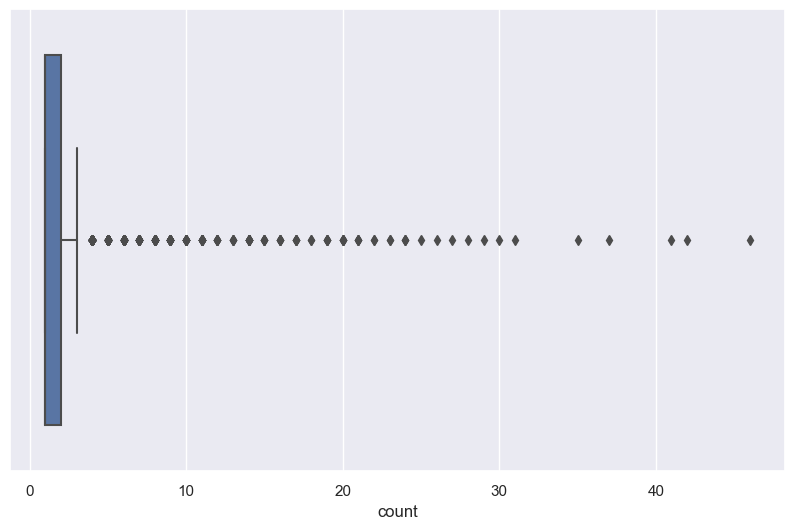

In [173]:
sns.boxplot(data=df_dnit, x="count")

## Comparando dados do DNIT com IBGE

Consertando dados para fazer o merge

In [174]:
## Duplicando dados do IBGE para as ligações tenha os 2 sentidos

df_ibge_1 = df_ibge[["CODMUNDV_A", "CODMUNDV_B","VAR06"]].copy(deep=True)
df_ibge_2 = df_ibge[["CODMUNDV_A", "CODMUNDV_B","VAR06"]].copy(deep=True)
df_ibge_2 = df_ibge_2.rename(columns={"CODMUNDV_B": "CODMUNDV_A", "CODMUNDV_A": "CODMUNDV_B"})
df_ibge_final = pd.concat([df_ibge_1, df_ibge_2])
df_ibge_final[df_ibge_final.duplicated()]

## Removendo valores 0 de frequência
df_ibge_final = df_ibge_final[df_ibge_final["VAR06"]>0]
df_ibge_final.shape

(130528, 3)

OBS.:
Após duplicar os dados para conter os dois sentidos ficamos com 130528 ligações no dados do IBGE.

In [175]:
## Fazendo merge do DNIT e IBGE

df = df_ibge_final.merge(df_dnit, left_on=['CODMUNDV_A','CODMUNDV_B'], right_on = ['GeocodOrigem','GeocodDestino'])
df = df.drop(columns=['CODMUNDV_A', 'CODMUNDV_B'])
df = df.rename(columns={"VAR06": "ibge", "freq_semanal": "dnit", "GeocodOrigem": "origem", "GeocodDestino": "destino"})

columns_titles = ["origem","destino", "ibge", "dnit"]
df=df.reindex(columns=columns_titles)

Foram encontradas 1211 ligações após o merge.

Verificando se os dados possuem a mesma tendência

In [176]:
df[["ibge","dnit"]].corr()

,ibge,dnit
ibge,1.000000,0.355933
dnit,0.355933,1.000000


Plotando dados no scatterplot

<AxesSubplot: xlabel='ibge', ylabel='dnit'>

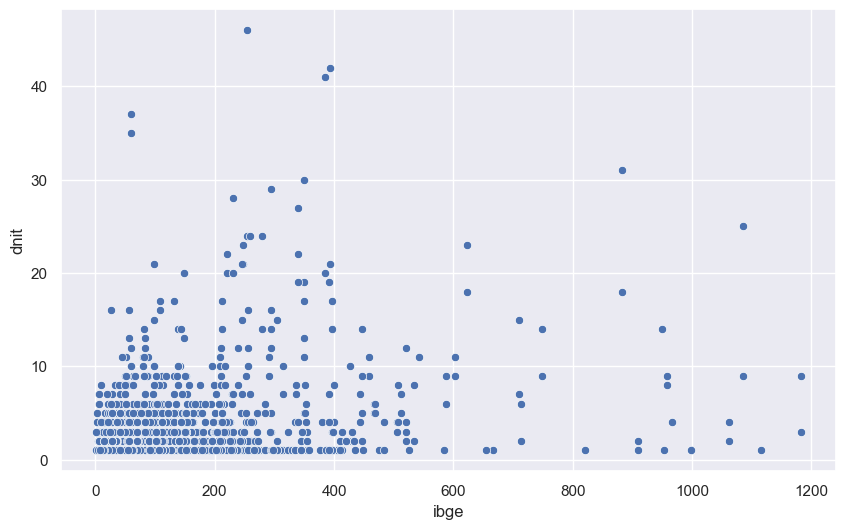

In [177]:
sns.set(rc={'figure.figsize':(10,6)})
sns.scatterplot(data=df, x="ibge", y="dnit")

In [178]:
df.loc[df['ibge'].idxmax()]
# Porto Alegre
# Tramandaí

origem     3548500.0
destino    3550308.0
ibge          1182.0
dnit             3.0
Name: 1024, dtype: float64